# Graph traversal and edge identification

https://www.youtube.com/watch?v=AfSk24UTFS8  
https://courses.csail.mit.edu/6.006/fall11/rec/rec14.pdf

In [30]:
from graphviz import Digraph

In [132]:
edges = [
    ['a', 'c'],
    ['a', 'b'],
    ['b', 'c'],
    ['a', 'd'],
    ['d', 'e'],
    ['e', 'a'],
    ['c', 'f'],
    ['b', 'f'], 
    ['c', 'g']
]

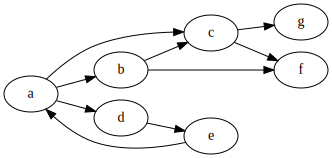

In [133]:
DG = Digraph(comment='hello', format='svg', engine='dot',
                 graph_attr={'size':'8', 'nodesep':'.16', 'rankdir':'LR' })

for s, t in edges:
    DG.edge( s, t )

DG

In [134]:
adj = {}
for s, t in edges:
    if s not in adj:
        adj[s] = [t]
    else:
        adj[s].append(t)
        
adj

{'a': ['c', 'b', 'd'],
 'b': ['c', 'f'],
 'c': ['f', 'g'],
 'd': ['e'],
 'e': ['a']}

In [153]:
class Result(object):
    
    def __init__(self):
        
        self.parent = {}
        self.edge_type = {}
        self.start_time = {}
        self.end_time = {}
        self.time = 0
        self.order = []
        self.farther = {}

In [154]:
def dfs_visit(u, adj, result, parent=None):
    result.parent[u] = parent
    result.time += 1
    result.start_time[u] = result.time
    
    if parent:
        result.edge_type[(parent, u)] = 'tree'
        
    for v in adj.get(u, []):
        
        if v not in result.parent:
            dfs_visit(v, adj, result, parent=u)
        elif v not in result.end_time:
            result.edge_type[(u, v)] = 'back'
        elif result.start_time[u] < result.end_time[v]:
            result.edge_type[(u, v)] = 'forward'
        else:
            result.edge_type[(u, v)] = 'cross'

    result.time += 1
    result.end_time[u] = result.time
    result.order.append(u)
    
result = Result()
dfs_visit('a', adj, result)
result.parent

{'a': None, 'b': 'a', 'c': 'a', 'd': 'a', 'e': 'd', 'f': 'c', 'g': 'c'}

In [151]:
print( sorted(result.start_time.items(), key=lambda x:x[1]) )
print( sorted(result.end_time.items(), key=lambda x:x[1]) )

[('a', 1), ('c', 2), ('f', 3), ('g', 5), ('b', 8), ('d', 10), ('e', 11)]
[('f', 4), ('g', 6), ('c', 7), ('b', 9), ('e', 12), ('d', 13), ('a', 14)]


In [152]:
print( result.edge_type )
print( result.order[::-1])

{('b', 'f'): 'cross', ('b', 'c'): 'cross', ('a', 'd'): 'tree', ('a', 'c'): 'tree', ('c', 'g'): 'tree', ('d', 'e'): 'tree', ('c', 'f'): 'tree', ('e', 'a'): 'back', ('a', 'b'): 'tree'}
['a', 'd', 'e', 'b', 'c', 'g', 'f']


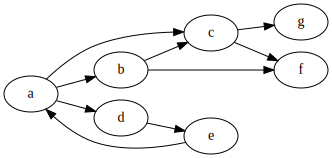

In [143]:
DG

In [162]:
def bfs(s, adj):
    level = {s: 0}
    parent = {s: None}
    frontier = [s]
    i = 1

    while frontier:
        to_visit = []
            
        for u in frontier:
            for v in adj.get(u, []):
                if v not in level:
                    level[v] = i
                    parent[v] = u
                    to_visit.append(v)
                elif level[v]<i:
                    parent[v] = u
                    
        frontier = to_visit
        i += 1 
    
    return level, parent
    
bfs('a', adj)

({'a': 0, 'b': 1, 'c': 1, 'd': 1, 'e': 2, 'f': 2, 'g': 2},
 {'a': 'e', 'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c', 'g': 'c'})

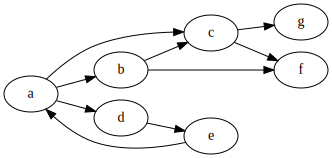

In [163]:
DG